<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

TrainPd=pd.read_excel("Concrete_Data.xls")

#renaming all featurses
TrainPd.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

# Split the data into features and target
X=TrainPd.drop(["strength"],axis=1)
Y=TrainPd["strength"]
Names=list(X.columns.values)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
Xtrain_80, Xtest_20, Ytrain_80, Ytest_20 = train_test_split(X, Y, test_size=0.20
                                                            ,random_state = 1)



In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instancier le modèle RandomForestRegressor avec les hyperparamètres spécifiés
model_rf = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='log2', n_estimators=45, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
model_rf.fit(Xtrain_80, Ytrain_80)

# Faire des prédictions sur l'ensemble de test
Y_pred_test = model_rf.predict(Xtest_20)

# Faire des prédictions sur l'ensemble d'entraînement
Y_pred_train = model_rf.predict(Xtrain_80)

# Calculer les métriques de performance sur l'ensemble de test
mae_test = mean_absolute_error(Ytest_20, Y_pred_test)
rmse_test = mean_squared_error(Ytest_20, Y_pred_test, squared=False)
r2_test = r2_score(Ytest_20, Y_pred_test)

# Calculer les métriques de performance sur l'ensemble d'entraînement
mae_train = mean_absolute_error(Ytrain_80, Y_pred_train)
rmse_train = mean_squared_error(Ytrain_80, Y_pred_train, squared=False)
r2_train = r2_score(Ytrain_80, Y_pred_train)

# Afficher les performances sur l'ensemble de test
print("Performance sur l'ensemble de test:")
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R²):", r2_test)

# Afficher les performances sur l'ensemble d'entraînement
print("\nPerformance sur l'ensemble d'entraînement:")
print("Mean Absolute Error (MAE):", mae_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R²):", r2_train)


Performance sur l'ensemble de test:
Mean Absolute Error (MAE): 3.1782987311113646
Root Mean Squared Error (RMSE): 4.842762205405272
R-squared (R²): 0.910039581411829

Performance sur l'ensemble d'entraînement:
Mean Absolute Error (MAE): 0.06607522259277285
Root Mean Squared Error (RMSE): 0.9453356919398538
R-squared (R²): 0.9968365588341648


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

TrainPd=pd.read_excel("Concrete_Data.xls")

#renaming all featurses
TrainPd.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

# Split the data into features and target
X=TrainPd.drop(["strength"],axis=1)
Y=TrainPd["strength"]
Names=list(X.columns.values)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
Xtrain_80, Xtest_20, Ytrain_80, Ytest_20 = train_test_split(X, Y, test_size=0.20
                                                            ,random_state = 1)

# Définition des hyperparamètres pour la recherche
hyperparameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
   # 'min_samples_split': [2, 5, 10],
   # 'min_samples_leaf': [1, 2, 4],
   # 'max_features': ['auto', 'sqrt', 'log2'],
   # 'criterion': ['mse', 'mae'],
   # 'splitter': ['best', 'random']
}

# Initialisation du modèle Decision Tree
tree_model = DecisionTreeRegressor(random_state=0)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(tree_model, hyperparameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(Xtrain_80, Ytrain_80)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utilisation des meilleurs hyperparamètres pour définir le modèle final
best_tree_model = DecisionTreeRegressor(**grid_search.best_params_, random_state=0)

# Entraînement du modèle sur l'ensemble d'entraînement à 80%
best_tree_model.fit(Xtrain_80, Ytrain_80)

# Prédiction sur l'ensemble de test à 20%
Y_pred = best_tree_model.predict(Xtest_20)

# Évaluation du modèle
mae = mean_absolute_error(Ytest_20, Y_pred)
mse = mean_squared_error(Ytest_20, Y_pred)
rmse = mean_squared_error(Ytest_20, Y_pred, squared=False)
r2 = r2_score(Ytest_20, Y_pred)

# Affichage des métriques d'évaluation
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

#Feature importance/importances des caractéristiques (variables) dans le modèle d'arbre de décision
importances=best_tree_model.feature_importances_
print (importances*100)
for i in range(X.shape[1]):
    print((Names[i],  importances[[i]]*100))


Meilleurs hyperparamètres: {'max_depth': 10}
Mean Absolute Error (MAE): 4.636881999264971
Mean Squared Error (MSE): 52.88326981221363
Root Mean Squared Error (RMSE): 7.27208840789313
R-squared (R²): 0.7971460452770537
[36.09139446  8.0425139   1.12215505  7.8431564   6.38932868  3.88907852
  2.72970811 33.89266489]
('cement', array([36.09139446]))
('blastFurnace', array([8.0425139]))
('flyAsh', array([1.12215505]))
('water', array([7.8431564]))
('superplasticizer', array([6.38932868]))
('courseAggregate', array([3.88907852]))
('fineaggregate', array([2.72970811]))
('age', array([33.89266489]))


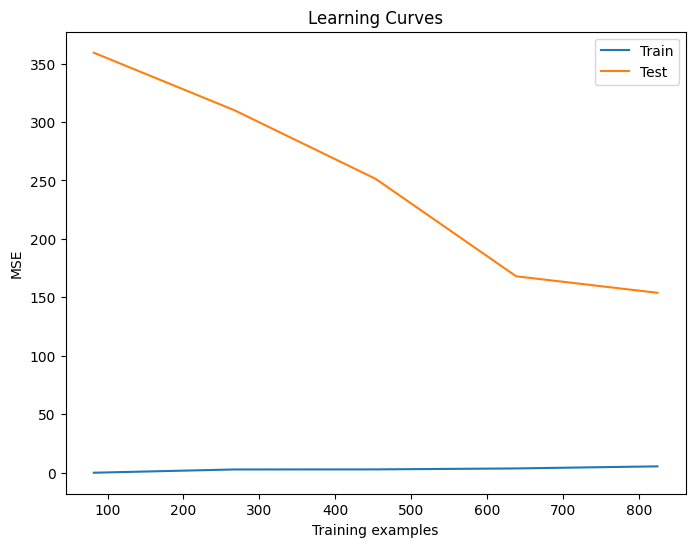

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_tree_model, X, Y, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [ ]:
# Entraînement du modèle sur l'ensemble d'entraînement à 80%
best_tree_model.fit(Xtrain_80, Ytrain_80)

# Prédiction sur l'ensemble d'entraînement et de test
Y_pred_train = best_tree_model.predict(Xtrain_80)
Y_pred_test = best_tree_model.predict(Xtest_20)

# Calcul des métriques d'évaluation pour l'ensemble d'entraînement
mse_train = mean_squared_error(Ytrain_80, Y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Ytrain_80, Y_pred_train)

# Calcul des métriques d'évaluation pour l'ensemble de test
mse_test = mean_squared_error(Ytest_20, Y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Ytest_20, Y_pred_test)

# Affichage des métriques d'évaluation
print("Performance sur l'ensemble d'entraînement:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R²):", r2_train)
print("\nPerformance sur l'ensemble de test:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R²):", r2_test)

Performance sur l'ensemble d'entraînement:
Mean Squared Error (MSE): 6.501447353702716
Root Mean Squared Error (RMSE): 2.549793590411333
R-squared (R²): 0.9769857036435775

Performance sur l'ensemble de test:
Mean Squared Error (MSE): 52.88326981221363
Root Mean Squared Error (RMSE): 7.27208840789313
R-squared (R²): 0.7971460452770537


In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Initialisation du modèle Random Forest avec des hyperparamètres
random_forest = RandomForestRegressor(n_estimators=8, random_state=0)

# Entraînement du modèle sur l'ensemble d'entraînement à 80%
random_forest.fit(Xtrain_80, Ytrain_80)

# Prédiction sur l'ensemble de test à 20%
Y_pred_rf = random_forest.predict(Xtest_20)

# Évaluation du modèle
mae_rf = mean_absolute_error(Ytest_20, Y_pred_rf)
mse_rf = mean_squared_error(Ytest_20, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Ytest_20, Y_pred_rf)

# Affichage des métriques d'évaluation pour Random Forest
print("Random Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - Root Mean Squared Error (RMSE):", rmse_rf)
print("Random Forest - R-squared (R²):", r2_rf)


Random Forest - Mean Absolute Error (MAE): 4.026029665961488
Random Forest - Mean Squared Error (MSE): 32.67414366380011
Random Forest - Root Mean Squared Error (RMSE): 5.716130130061781
Random Forest - R-squared (R²): 0.8746658577859577


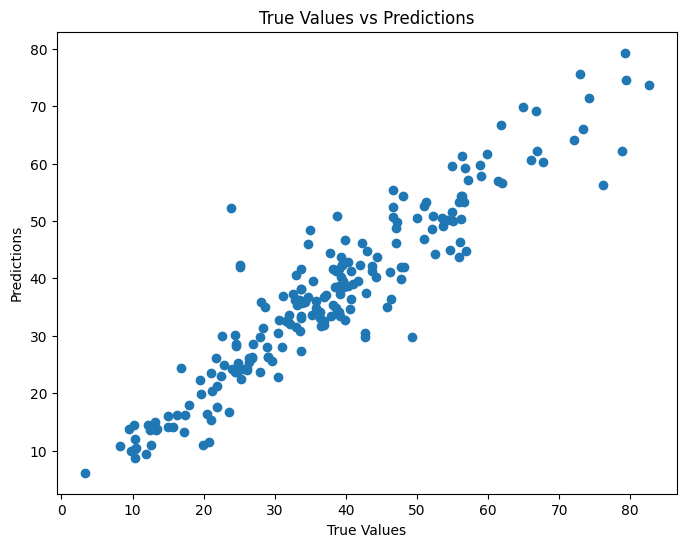

In [ ]:
import matplotlib.pyplot as plt
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Ytest_20, Y_pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [ ]:
##########################

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20,10)]
#
bootstrap = [True, False]

# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
                'bootstrap':bootstrap,}
print(hyperparameters)
###########################

# Initialisation du modèle Random Forest
random_forest = RandomForestRegressor(random_state=0)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(random_forest, hyperparameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(Xtrain_80, Ytrain_80)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utilisation des meilleurs hyperparamètres pour définir le modèle final
best_random_forest = RandomForestRegressor(**grid_search.best_params_, random_state=0)

# Entraînement du modèle sur l'ensemble d'entraînement à 80%
best_random_forest.fit(Xtrain_80, Ytrain_80)

# Prédiction sur l'ensemble de test à 20%
Y_pred_rf = best_random_forest.predict(Xtest_20)

# Évaluation du modèle
mae_rf = mean_absolute_error(Ytest_20, Y_pred_rf)
mse_rf = mean_squared_error(Ytest_20, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Ytest_20, Y_pred_rf)

# Affichage des métriques d'évaluation pour Random Forest
print("Random Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - Root Mean Squared Error (RMSE):", rmse_rf)
print("Random Forest - R-squared (R²):", r2_rf)

{'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20], 'bootstrap': [True, False]}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Meilleurs hyperparamètres: {'bootstrap': False, 'max_depth': 15, 'max_features': 'log2', 'n_estimators': 45}
Random Forest - Mean Absolute Error (MAE): 3.357647407091104
Random Forest - Mean Squared Error (MSE): 25.58491884515647
Random Forest - Root Mean Squared Error (RMSE): 5.058153699242093
Random Forest - R-squared (R²): 0.9018592839014093


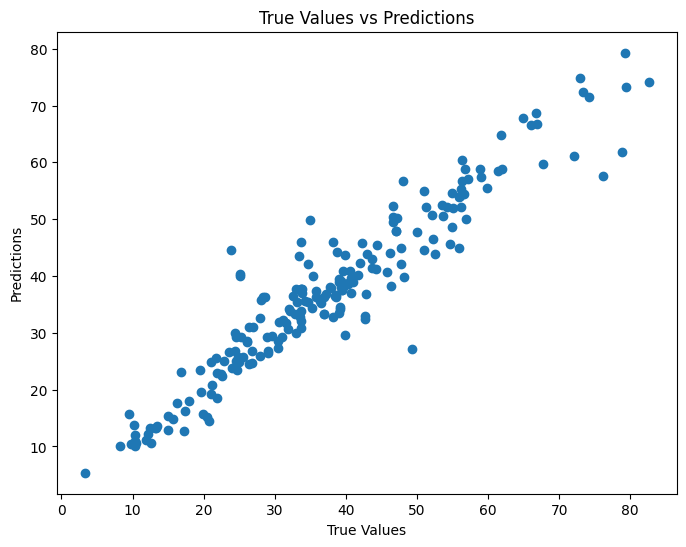

In [ ]:
import matplotlib.pyplot as plt
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Ytest_20, Y_pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20,10)]
#
bootstrap = [True, False]

# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
                'bootstrap':bootstrap,}
print(hyperparameters)

{'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20], 'bootstrap': [True, False]}


In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Définition des hyperparamètres pour la recherche
hyperparameters = {
    'n_estimators': [100, 200, 300],  # Nombre d'estimateurs dans la forêt
    'max_depth': [None, 5, 10, 19, 15],  # Profondeur maximale de chaque arbre
    'max_features': ['auto', 'sqrt', 'log2'],  # Nombre maximum de fonctionnalités pour une division
    'bootstrap': [True, False]  # Contrôle le tirage avec remplacement pour la construction des arbres
}

# Initialisation du modèle Random Forest
random_forest = RandomForestRegressor(random_state=0)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(random_forest, hyperparameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(Xtrain_80, Ytrain_80)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utilisation des meilleurs hyperparamètres pour définir le modèle final
best_random_forest = RandomForestRegressor(**grid_search.best_params_, random_state=0)

# Entraînement du modèle sur l'ensemble d'entraînement à 80%
best_random_forest.fit(Xtrain_80, Ytrain_80)

# Prédiction sur l'ensemble de test à 20%
Y_pred_rf = best_random_forest.predict(Xtest_20)

# Évaluation du modèle
mae_rf = mean_absolute_error(Ytest_20, Y_pred_rf)
mse_rf = mean_squared_error(Ytest_20, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Ytest_20, Y_pred_rf)

# Affichage des métriques d'évaluation pour Random Forest
print("Random Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - Root Mean Squared Error (RMSE):", rmse_rf)
print("Random Forest - R-squared (R²):", r2_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Meilleurs hyperparamètres: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
Random Forest - Mean Absolute Error (MAE): 3.227676187081533
Random Forest - Mean Squared Error (MSE): 24.92215755575877
Random Forest - Root Mean Squared Error (RMSE): 4.992209686677711
Random Forest - R-squared (R²): 0.9044015576501584


In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(Tree_model, out_file=None,
                                feature_names=Names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,4), dpi=800)
tree.plot_tree(Tree_model,
               feature_names = Names,
              # class_names=cn,
               filled = True)

fig.savefig('Tree_photo.jpg')

In [ ]:
#test du modele

Prediction=Tree_model.predict([(410,0,0,199,0,929,854,28)])
Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  


array([37.8125331])